In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# precipitation in million cubic metres
un_prec = pd.read_csv('6_UNdata_Export_20211006_213345967.csv')
un_prec

,Country or Area,Year,Value,Value Footnotes,Unit
0,Albania,2015,32711.0,NaN,million cubic metres
1,Albania,2014,37172.0,NaN,million cubic metres
2,Albania,2013,30615.0,NaN,million cubic metres
3,Albania,2012,28058.0,NaN,million cubic metres
4,Albania,2011,30569.0,NaN,million cubic metres
...,...,...,...,...,...
1729,18,"The values for precipitation, evapotranspirati...",NaN,NaN,NaN
1730,19,Values are based on the formula (volume = [are...,NaN,NaN,NaN
1731,20,"The average annual amount of precipitation, wi...",NaN,NaN,NaN
1732,21,Data on precipitation are obtained by using th...,NaN,NaN,NaN


In [ ]:
# check the last rows
un_prec.tail(25)

,Country or Area,Year,Value,Value Footnotes,Unit
1709,Zimbabwe,1995,163650.0,NaN,million cubic metres
1710,Zimbabwe,1990,244264.0,NaN,million cubic metres
1711,fnSeqID,Footnote,NaN,NaN,NaN
1712,1,Annual Water Balance Study (multiple regressio...,NaN,NaN,NaN
1713,2,Annual Water Balance Study (Constant Gradient ...,NaN,NaN,NaN
1714,3,Formula of Precipitation= Yearly Average Rainf...,NaN,NaN,NaN
1715,4,Estimate.,NaN,NaN,NaN
1716,5,The figures are based on metrological year sta...,NaN,NaN,NaN
1717,6,Average annual precipitation. Costa Rica has 6...,NaN,NaN,NaN
1718,7,1991 data.,NaN,NaN,NaN


In [ ]:
#cut the last rows, no-country rows
un_prec_cut_rows = un_prec.iloc[:1711]
un_prec_cut_rows.tail(5)

,Country or Area,Year,Value,Value Footnotes,Unit
1706,Zimbabwe,2001,284708.0,NaN,million cubic metres
1707,Zimbabwe,2000,345236.0,NaN,million cubic metres
1708,Zimbabwe,1999,304363.0,NaN,million cubic metres
1709,Zimbabwe,1995,163650.0,NaN,million cubic metres
1710,Zimbabwe,1990,244264.0,NaN,million cubic metres


In [ ]:
#keep only the columns with needed info
un_prec_cut_cols = un_prec_cut_rows[['Country or Area','Year','Value']]
un_prec_cut_cols

,Country or Area,Year,Value
0,Albania,2015,32711.0
1,Albania,2014,37172.0
2,Albania,2013,30615.0
3,Albania,2012,28058.0
4,Albania,2011,30569.0
...,...,...,...
1706,Zimbabwe,2001,284708.0
1707,Zimbabwe,2000,345236.0
1708,Zimbabwe,1999,304363.0
1709,Zimbabwe,1995,163650.0


In [ ]:
# sort by year instead of name of the country (default)
prec_sort_yearly = un_prec_cut_cols.sort_values(by=['Year'])
prec_sort_yearly

,Country or Area,Year,Value
1710,Zimbabwe,1990,244264.000000
1566,Switzerland,1990,54704.000000
193,Belarus,1990,151963.203125
816,Jordan,1990,8379.000000
1132,Netherlands,1990,24940.000000
...,...,...,...
607,Georgia,2015,72390.421875
149,Bahrain,2015,50.599998
568,France,2015,429730.093750
795,Jordan,2015,8884.000000


In [ ]:
#group by year and add the values for all countries for each year 
sum_prec_world = prec_sort_yearly.groupby(by=['Year']).sum()[['Value']]
sum_prec_world

,Value
Year,
1990,1.061862e+07
1991,2.577907e+06
1992,2.773044e+06
1993,2.843728e+06
1994,2.920710e+06
1995,1.884868e+07
1996,1.661845e+07
1997,1.800199e+07
1998,1.886174e+07


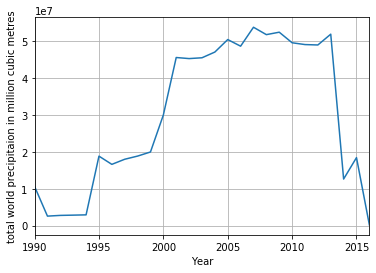

In [ ]:
sum_prec_world['Value'].plot()
plt.ylabel('total world precipitaion in million cubic metres')
plt.grid()
plt.show()

In [ ]:
#not for every country a value has been reported for each year==>the sum might not be a good representative
prec_howmany = prec_sort_yearly.groupby(by=['Year']).count()[['Country or Area']]
prec_howmany

,Country or Area
Year,
1990,71
1991,25
1992,25
1993,25
1994,24
1995,67
1996,56
1997,57
1998,55


In [ ]:
#group by year and take the mean of all the values for all countries for each year 
mean_prec_world = prec_sort_yearly.groupby(by=['Year']).mean()[['Value']]
mean_prec_world

,Value
Year,
1990,149557.971627
1991,103116.285106
1992,110921.771899
1993,113749.137628
1994,121696.268974
1995,281323.559033
1996,296758.002424
1997,315824.444801
1998,342940.637106


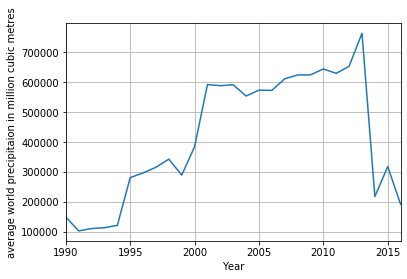

In [ ]:
mean_prec_world['Value'].plot()
plt.ylabel('average world precipitaion in million cubic metres')
plt.grid()
plt.show()